In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [2]:
#grab tickers from csv file
watchlist_df = pd.read_csv('watchlist.csv', header=None)
watchlist = watchlist_df.iloc[0].tolist()

In [3]:
watchlist

['AAPL', 'ADBE', 'AMD', 'MSFT', 'NFLX']

In [4]:
'''instantiate TimeSeries class from alpha_vantage library
you must have API keys stored as environment variables for this to work
check out the Alpha Vantage guide on the AlgoTrading 101 blog for more details'''
app = TimeSeries(output_format='pandas')

In [5]:
#itter through watchlist and retrieve daily price data
stocks_df = pd.DataFrame()
for ticker in watchlist:
    alphav_df = app.get_daily_adjusted(ticker)
    alphav_df = alphav_df[0]
    alphav_df.columns = [i.split(' ')[1] for i in alphav_df.columns]

    stocks_df[ticker] = alphav_df['adjusted'].pct_change()

In [6]:
stocks_df.head()

,AAPL,ADBE,AMD,MSFT,NFLX
date,,,,,
2020-04-29,NaN,NaN,NaN,NaN,NaN
2020-04-28,-0.031801,-0.045021,0.034476,-0.042947,-0.019568
2020-04-27,0.016476,0.045134,0.017654,0.024969,0.043459
2020-04-24,-0.000706,-0.012626,-0.005488,0.002873,0.008567
2020-04-23,-0.028060,-0.025371,-0.004984,-0.017932,0.004024


In [7]:
#AAPL correlation with ADBE
stocks_df.AAPL.corr(stocks_df.ADBE)

0.8784037571217244

In [8]:
#AAPL correlation with NFLX
stocks_df.AAPL.corr(stocks_df.NFLX)

0.6658107939470779

In [9]:
#correlation using kendall method
stocks_df.AAPL.corr(stocks_df.NFLX, method='kendall')

0.3988868274582561

In [10]:
#correlation using spearman method
stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman')

0.548930117501546

In [12]:
#correlation matrix
stocks_df.corr()

,AAPL,ADBE,AMD,MSFT,NFLX
AAPL,1.000000,0.878404,0.791425,0.931861,0.665811
ADBE,0.878404,1.000000,0.786803,0.923112,0.780611
AMD,0.791425,0.786803,1.000000,0.810465,0.682898
MSFT,0.931861,0.923112,0.810465,1.000000,0.708690
NFLX,0.665811,0.780611,0.682898,0.708690,1.000000


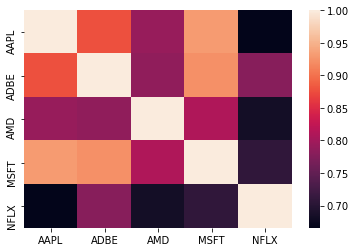

In [14]:
import seaborn as sns
ax = sns.heatmap(stocks_df.corr())

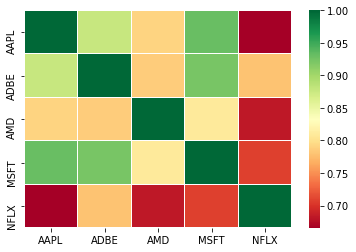

In [16]:
ax = sns.heatmap(stocks_df.corr(), cmap='RdYlGn', linewidths=.1)

In [17]:
#strongest correlated stock with Netflix
nflx_corr_df = stocks_df.corr().NFLX
print(nflx_corr_df[ nflx_corr_df < 1 ].idxmax())

ADBE


In [19]:
#least correlated with Netflix
print(nflx_corr_df.idxmin())

AAPL


In [20]:
#create covariance matrix
stocks_df.cov()

,AAPL,ADBE,AMD,MSFT,NFLX
AAPL,0.001325,0.001255,0.001323,0.001272,0.000800
ADBE,0.001255,0.001540,0.001418,0.001359,0.001011
AMD,0.001323,0.001418,0.002109,0.001396,0.001035
MSFT,0.001272,0.001359,0.001396,0.001407,0.000878
NFLX,0.000800,0.001011,0.001035,0.000878,0.001090
